# DataloadFasionMNIST:封装的数据集加载模块

> Note:本notebook仅用于对/MODULE/DataloadFasionMNIST.py模块的演示

## 运行环境

### 硬件

+ `CPU`:AMD Ryzen 7 5800H with Radeon Graphics 3.20 GHz

### 软件

+ `OS`:(WSL2)Linux Ubuntu 22.04.2 LTS

+ `Compiler`:Python 3.7.16

+ `Other Environment`:Anaconda<conda(23.3.1) notebook(6.5.6)> cuda:12.0

## 导入所需的module

+ torch (1.12.1)

+ torchvision (0.13.1)

+ matplotlib (3.5.1)

In [21]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

## 设定环境变量

+ `dataset_path`:可修改，用于指定加载/下载数据集的地址

+ `batch_size`:可修改，用于指定读取数据单位大小

+ `workers`:可修改，用于指定数据集加载的线程数

In [22]:
dataset_path = '/home/kambri/DATA' 
batch_size = 256
workers = 4

## 辅助函数

+ `get_labels(..)`:返回FasionMNIST的文本标签

+ `show_images(..)`:使用d2l包展示数据集

+ `get_workers()`:返回可用线程数

In [23]:
'''返回FasionMNIST的文本标签'''
def get_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

'''展示数据集'''
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    # 设置图像尺寸
    figsize = (num_cols * scale, num_rows * scale) # 指定num_rows行num_cols列的子图网格
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            img = img.numpy() # 将张量转化为numpy数组
            if img.ndim == 3:
                img = img.transpose(1, 2, 0)
                # 映射灰度图
            ax.imshow(img, cmap='gray' if img.ndim == 2 else None)
        else:
            ax.imshow(img, cmap='gray' if img.ndim == 2 else None)
        ax.axis('off')  # 隐藏坐标轴
        if titles:
            ax.set_title(titles[i])
    
    plt.tight_layout() # 调整多图，防止重叠
    plt.show()
    return axes

'''指定工作进程,可修改'''
def get_workers():
    return workers

## 加载函数

+ 通过ToTensor实例将图像数据从PIL类型变换为32位浮点数类型，并除以255使得数据归一(\[0,1\])

+ 若指定了resize，则将数据reshape为指定大小(resize\*resize)的tensor

+ 分别加载训练集(mnist_train)和测试集(mnist_test) (若本地无数据集则下载)

+ 返回训练集和测试集并加载到内存

In [24]:
'''下载数据集并加载到内存中'''
def load_dataset(batch_size, resize=None):  
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root=dataset_path, train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root=dataset_path, train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,num_workers=get_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,num_workers=get_workers()))

## 测试函数

+ 模拟加载函数的功能

+ 输出训练集和测试集的长度，训练集中每个元素的尺寸和类型

+ 将数据集放入dataloader中，构造iterator并取一小批量并展示图片

In [25]:
'''测试加载数据集,并输出数据集信息和展示图片,例如调用__test__(32, resize=64),当resize=None时分辨率为784=28*28'''
def __test__(batch_size, resize=28):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root=dataset_path, train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root=dataset_path, train=False, transform=trans, download=True)
    print('The size of dataset(train) is {}. The size of dataset(test) is {}.'.format(len(mnist_train), len(mnist_test)))
    for X, y in mnist_train:
        print('Dataset(train) each element X: Shape:{}  Type:{}'.format(X.shape, X.dtype))
        break
    X, y = next(iter(data.DataLoader(mnist_train, batch_size)))
    show_images(X.reshape(batch_size, resize, resize), 2, batch_size//2, titles=get_labels(y))

The size of dataset(train) is 60000. The size of dataset(test) is 10000.
Dataset(train) each element X: Shape:torch.Size([1, 28, 28])  Type:torch.float32


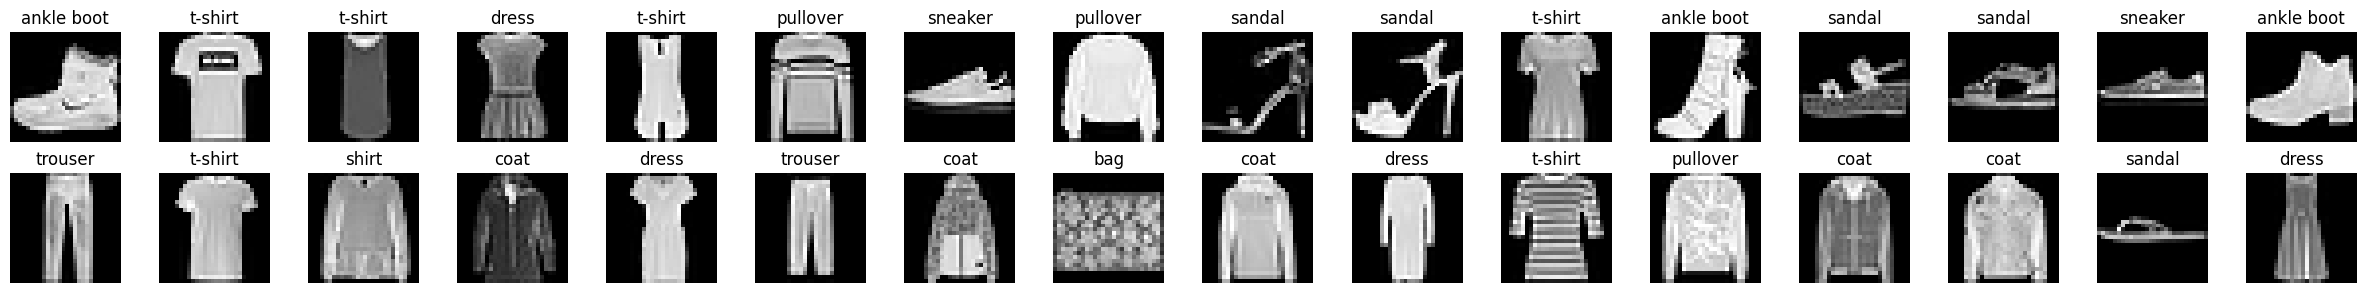

In [26]:
__test__(32)

The size of dataset(train) is 60000. The size of dataset(test) is 10000.
Dataset(train) each element X: Shape:torch.Size([1, 64, 64])  Type:torch.float32


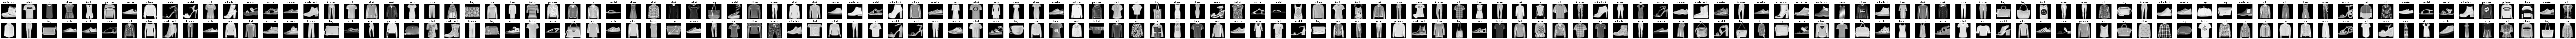

In [27]:
__test__(256, resize=64)

The size of dataset(train) is 60000. The size of dataset(test) is 10000.
Dataset(train) each element X: Shape:torch.Size([1, 31, 31])  Type:torch.float32


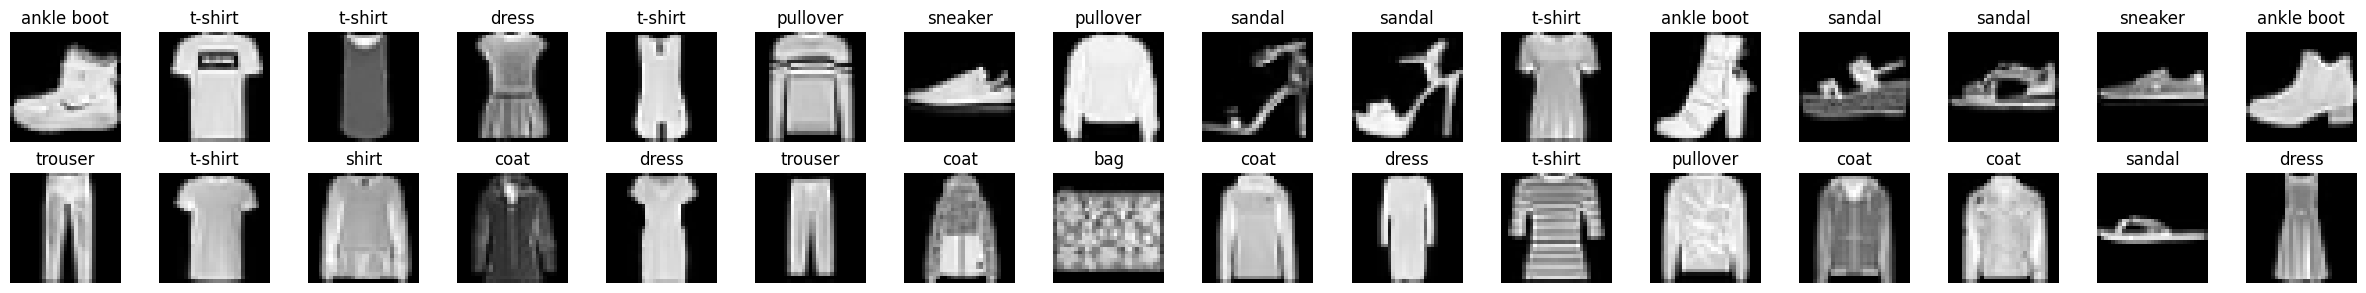

In [28]:
__test__(32, resize=31)